
# Project: TMDB MOVIE DATA ANALYSIS

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The movie industry over the years has evolved to become a very important segment of every society. It's positive contribution to the society ranges from just providing entertainment to adding to the economic strength of nations. This has indeed nessesitated the interest and concerns on the data generated by this industry.
This project is aimed at analysing the TMDB movie dataset to understand the factors associated to movies that generate high revenue in other to inform the decision of filmakers to optimize profit.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_movie = pd.read_csv('tmdb-movies.csv')
pd.set_option('max_column',21)


## Getting the structural info of the dataset

In [13]:
df_movie.shape
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

# <a id='wrangling'></a>
## Data Wrangling

##### General Properties of the TMDB dataset

In [14]:
df_movie.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  \
0              The park is open.   
1             What a Lovely Day.   
2     One Choice Can Destroy You   
3  Every generation has a story.   
4            Vengeance Hits Home   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   
2  based on novel|revolution|dystopia|sequel|dyst...   
3              android|spaceship|jedi|space opera|3d   
4                car race|speed|revenge|suspense|car   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   
2  Beatrice Prior must confront her inner demons ...      119   
3  Thirty years after defeating the Galactic Empi...      136   
4  Deckard Shaw seeks revenge against Dominic Tor...      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09

In [15]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

The TMDB MOVIE data consist of 10866 rows and 21 cloumns namely: 'id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title','cast', 'homepage', 'director', 'tagline', 'keywords', 'overview','runtime', 'genres', 'production_companies', 'release_date','vote_count', 'vote_average', 'release_year', 'budget_adj' and 'revenue_adj'.
From the data info above, columns such as imdb_id, cast, homepage, director, keyword, overview, tagline,generes and production companies have some missing data that has to be regularized so as to enhance data exploration.

# Cleaning TMDB movie dataset

##### Triming out cloumns such as imdb_id, homepage,cast,tagline and keywords as they will not be having any effect on the analysis.

In [16]:
df_movie.drop(['imdb_id','homepage','cast','tagline','keywords','budget_adj','revenue_adj','overview'],axis=1, inplace = True)

##### Checking for duplicates in the dataset.

In [17]:
df_movie.duplicated().value_counts()

False    10865
True         1
dtype: int64

##### Removing the daplicated data.

In [18]:
df_movie.drop_duplicates()

id  popularity     budget     revenue  \
0      135397   32.985763  150000000  1513528810   
1       76341   28.419936  150000000   378436354   
2      262500   13.112507  110000000   295238201   
3      140607   11.173104  200000000  2068178225   
4      168259    9.335014  190000000  1506249360   
...       ...         ...        ...         ...   
10861      21    0.080598          0           0   
10862   20379    0.065543          0           0   
10863   39768    0.065141          0           0   
10864   21449    0.064317          0           0   
10865   22293    0.035919      19000           0   

                     original_title            director  runtime  \
0                    Jurassic World     Colin Trevorrow      124   
1                Mad Max: Fury Road       George Miller      120   
2                         Insurgent    Robert Schwentke      119   
3      Star Wars: The Force Awakens         J.J. Abrams      136   
4                         Furious 7           James Wan      137   
...                             ...                 ...      ...   
10861            The Endless Summer         Bruce Brown       95   
10862                    Grand Prix  John Frankenheimer      176   
10863           Beregis Avtomobilya      Eldar Ryazanov       94   
10864        What's Up, Tiger Lily?         Woody Allen       80   
10865      Manos: The Hands of Fate    Harold P. Warren       74   

                                          genres  \
0      Action|Adventure|Science Fiction|Thriller   
1      Action|Adventure|Science Fiction|Thriller   
2             Adventure|Science Fiction|Thriller   
3       Action|Adventure|Science Fiction|Fantasy   
4                          Action|Crime|Thriller   
...                                          ...   
10861                                Documentary   
10862                     Action|Adventure|Drama   
10863                             Mystery|Comedy   
10864                              Action|Comedy   
10865                                     Horror   

                                    production_companies release_date  \
0      Universal Studios|Amblin Entertainment|Legenda...       6/9/15   
1      Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15   
2      Summit Entertainment|Mandeville Films|Red Wago...      3/18/15   
3              Lucasfilm|Truenorth Productions|Bad Robot     12/15/15   
4      Universal Pictures|Original Film|Media Rights ...       4/1/15   
...                                                  ...          ...   
10861                                  Bruce Brown Films      6/15/66   
10862  Cherokee Productions|Joel Productions|Douglas ...     12/21/66   
10863                                            Mosfilm       1/1/66   
10864                            Benedict Pictures Corp.      11/2/66   
10865                                          Norm-Iris     11/15/66   

       vote_count  vote_average  release_year  
0            5562           6.5          2015  
1            6185           7.1          2015  
2            2480           6.3          2015  
3            5292           7.5          2015  
4            2947           7.3          2015  
...           ...           ...           ...  
10861          11           7.4          1966  
10862          20           5.7          1966  
10863          11           6.5          1966  
10864          22           5.4          1966  
10865          15           1.5          1966  

[10865 rows x 13 columns]

##### Droping missing values for columns with missing values as their data types are all objects and just filling with a random value will not help the aim of this analysis. 

In [19]:
df_movie.dropna(inplace=True)

##### Adding a new column for the income generated for each movie

In [20]:
df_movie['income_generated'] = df_movie['revenue'] - df_movie['budget']

In [21]:
df_movie.head(10)

id  popularity     budget     revenue                original_title  \
0  135397   32.985763  150000000  1513528810                Jurassic World   
1   76341   28.419936  150000000   378436354            Mad Max: Fury Road   
2  262500   13.112507  110000000   295238201                     Insurgent   
3  140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4  168259    9.335014  190000000  1506249360                     Furious 7   
5  281957    9.110700  135000000   532950503                  The Revenant   
6   87101    8.654359  155000000   440603537            Terminator Genisys   
7  286217    7.667400  108000000   595380321                   The Martian   
8  211672    7.404165   74000000  1156730962                       Minions   
9  150540    6.326804  175000000   853708609                    Inside Out   

                         director  runtime  \
0                 Colin Trevorrow      124   
1                   George Miller      120   
2                Robert Schwentke      119   
3                     J.J. Abrams      136   
4                       James Wan      137   
5  Alejandro GonzÃ¡lez IÃ±Ã¡rritu      156   
6                     Alan Taylor      125   
7                    Ridley Scott      141   
8        Kyle Balda|Pierre Coffin       91   
9                     Pete Docter       94   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   
5           Western|Drama|Adventure|Thriller   
6  Science Fiction|Action|Thriller|Adventure   
7            Drama|Adventure|Science Fiction   
8          Family|Animation|Adventure|Comedy   
9                    Comedy|Animation|Family   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   
5  Regency Enterprises|Appian Way|CatchPlay|Anony...     12/25/15        3929   
6            Paramount Pictures|Skydance Productions      6/23/15        2598   
7  Twentieth Century Fox Film Corporation|Scott F...      9/30/15        4572   
8      Universal Pictures|Illumination Entertainment      6/17/15        2893   
9  Walt Disney Pictures|Pixar Animation Studios|W...       6/9/15        3935   

   vote_average  release_year  income_generated  
0           6.5          2015        1363528810  
1           7.1          2015         228436354  
2           6.3          2015         185238201  
3           7.5          2015        1868178225  
4           7.3          2015        1316249360  
5           7.2          2015         397950503  
6           5.8          2015         285603537  
7           7.6          2015         487380321  
8           6.5          2015        1082730962  
9           8.0          2015         678708609

<a id='eda'></a>
## Exploratory Data Analysis

### Analizing data to know which year the most movie was released and income generated

In [52]:
def label(x,y,t):
    """
    Args:
    x(str): 'x-axis title'
    y(str): 'y-axis title'
    t(str): 'main title'
    Returns:
    None

    """
    plt.xlabel(x,fontsize = 20)
    plt.ylabel(y,fontsize = 20)
    plt.title(t,fontsize = 25)
    plt.tight_layout()
    plt.show()


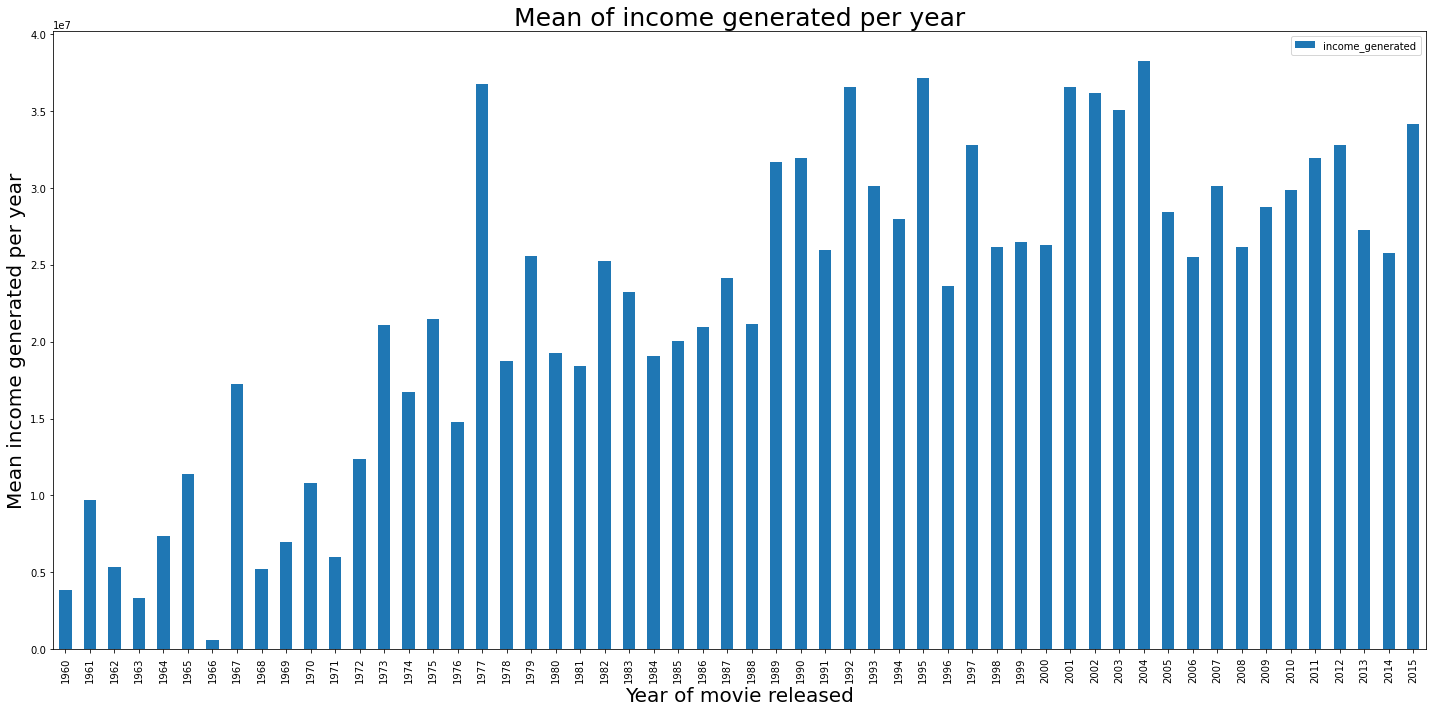

In [53]:
df_movie[['release_year','income_generated']].groupby('release_year').mean().plot(kind='bar',figsize=(20,10))
label('Year of movie released','Mean income generated per year','Mean of income generated per year')

#### The bar chart above clearly illustrate the mean income_generated for each year. This reveals that 2004 has the most average income_generated.

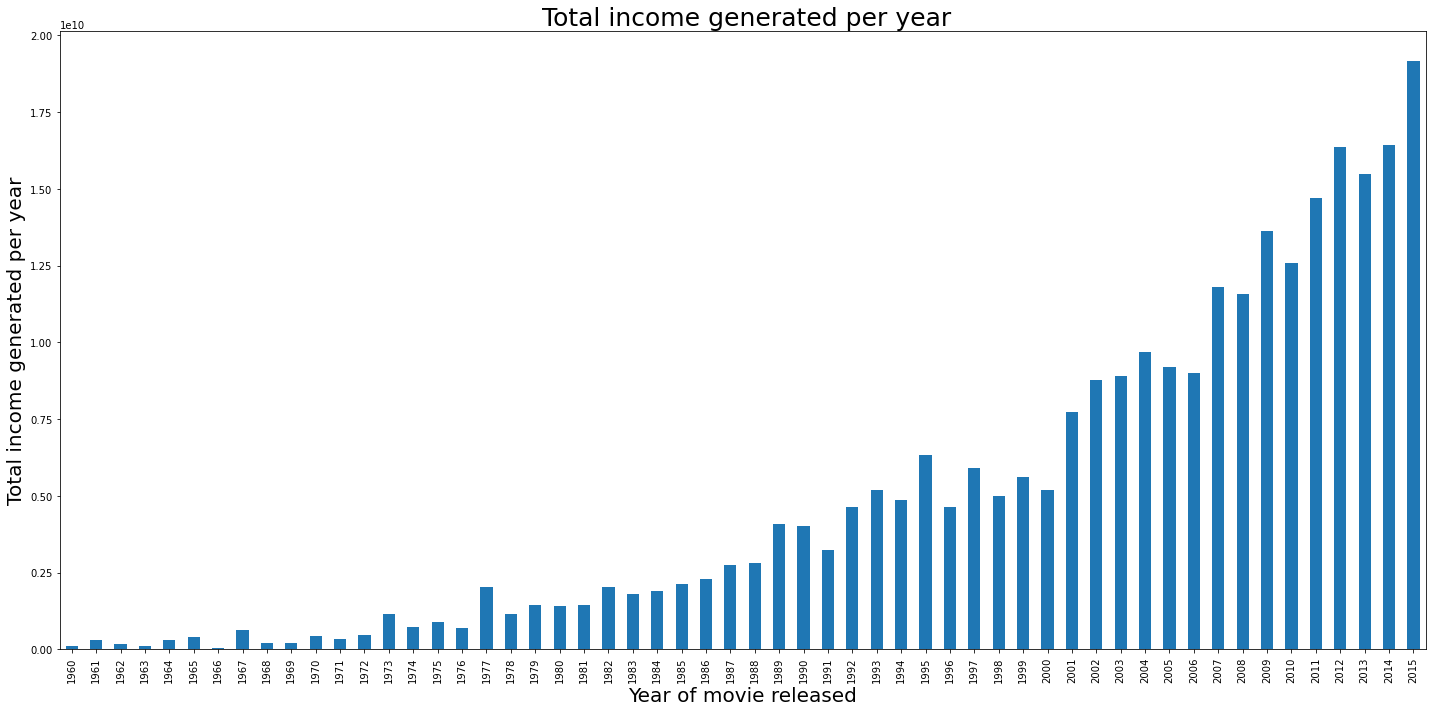

In [54]:
df_movie['income_generated'].groupby(df_movie['release_year']).sum().plot(kind='bar',figsize =(20,10))
label('Year of movie released','Total income generated per year',' Total income generated per year')

#### Also, the bar chart clearly illustrates the total income generated per year. 2015 saw the most income_generated.

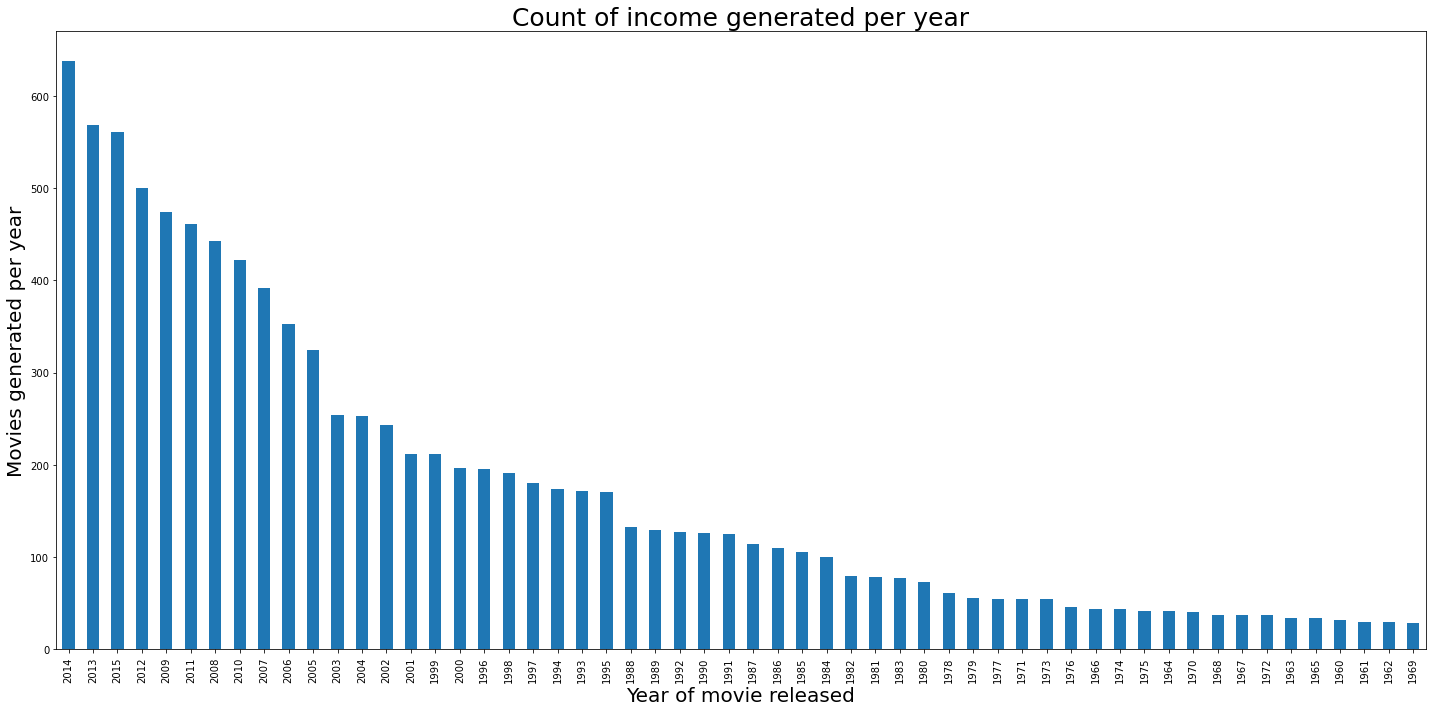

In [55]:
df_movie['release_year'].value_counts().plot(kind='bar',figsize =(20,10))
label('Year of movie released','Movies generated per year','Count of income generated per year')

#### The above bar chart shows the number of movies produced per year. Form the above, it can be seen that in 2014, more movies were produced.

#### Obervations:
The above plots shows the bar representation of the total number of movie produced per year, the total income generated per year and the average(mean) income generated per year for TMDB dataset.
In 2014, the highest number of movie was produced(638 movies) but that year was not the year that the most income was made. However, this does not confirm that the null hypothesis of the income generated not being a fuction of the number of movies produced.

### Analysing the dataset to know the relationship between the movie runtime and the income generated.

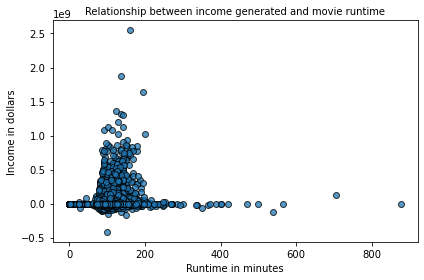

In [64]:
df_runtime = df_movie['runtime']
df_income = df_movie['income_generated']
plt.scatter(df_movie['runtime'],df_movie['income_generated'],edgecolor='black',linewidth=1,alpha=0.75)
plt.title('Relationship between income generated and movie runtime',fontsize = 10)
plt.ylabel('Income in dollars',fontsize = 10)
plt.xlabel('Runtime in minutes',fontsize = 10)
plt.tight_layout()
plt.show()

### Observation
From the scattered plot above, it is observed that there is no linear correlation between the runtime of movies and the income generated. However, this can only be confirmed only after neccessary statistical tests have proven so.

### Analysis that shows the correlation between all attributes of the TMDB dataset

id  popularity    budget   revenue   runtime  \
id                1.000000    0.001580 -0.136659 -0.095440 -0.097224   
popularity        0.001580    1.000000  0.539226  0.662552  0.157113   
budget           -0.136659    0.539226  1.000000  0.731317  0.215089   
revenue          -0.095440    0.662552  0.731317  1.000000  0.183607   
runtime          -0.097224    0.157113  0.215089  0.183607  1.000000   
vote_count       -0.027250    0.803009  0.627229  0.788616  0.184345   
vote_average     -0.085555    0.236801  0.094120  0.190287  0.185438   
release_year      0.509527    0.110185  0.137565  0.071268 -0.131931   
income_generated -0.071938    0.629450  0.566210  0.976256  0.153580   

                  vote_count  vote_average  release_year  income_generated  
id                 -0.027250     -0.085555      0.509527         -0.071938  
popularity          0.803009      0.236801      0.110185          0.629450  
budget              0.627229      0.094120      0.137565          0.566210  
revenue             0.788616      0.190287      0.071268          0.976256  
runtime             0.184345      0.185438     -0.131931          0.153580  
vote_count          1.000000      0.277981      0.124186          0.753852  
vote_average        0.277981      1.000000     -0.137563          0.200074  
release_year        0.124186     -0.137563      1.000000          0.042437  
income_generated    0.753852      0.200074      0.042437          1.000000

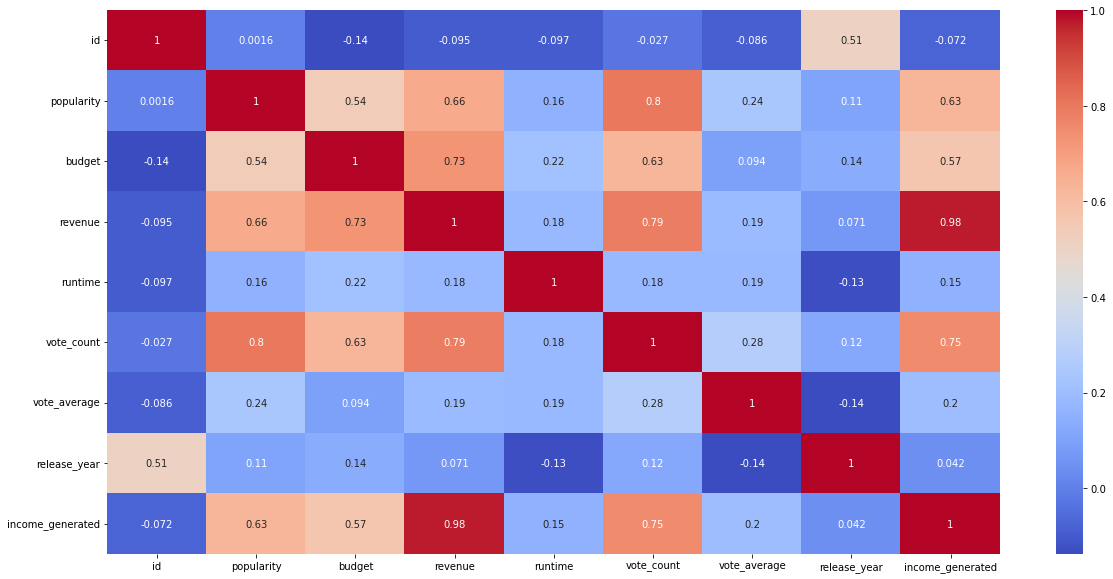

In [28]:
plt.figure(figsize=(20,10))
corel = df_movie.corr()
sns.heatmap(corel, cmap='coolwarm', annot=True)
corel

### Observation

From the heatmap above, it is observed that several attributes such as vote_count,budget,revenue and populariry have either a moderate, a mild or a high correlation value with the income generated and as such may affect the income generated by movie production companies.

<a id='conclusions'></a>
## Conclusions
<p>
The analysis on the TMDB dataset was aimed at knowing some the factors associated to generating high revenue in the movie production industry, so as to inform the decision of filmakers to optimize profit.<br>
The analysis process involved getting the dataset, understanding the structure of the data, cleaning the data and exploring the data.
During the course exploration, some research questions were asked, findings were made and observations were stated.
Conclusively, it was observed that:<br>
1. The number of movies produced does not translate to the volume of profit made.<br>
2. The runtime(Duration) of a movie does not have a correlation with the profit the movie makes.<br>
3. Attributes or factors such as vote_count,budget,revenue and populariry have either a moderate, a mild or a high correlation value with the income generated and as such may affect the income generated by movie production companies.<rb>
Although this observations were made, they can only be confirmed after being subjected to the neccessary statistical tests.
</p>


## Limitation

There was no significant limitation to this analysis. Nevertheless, i hope to conduct a further analysis on the dataset to explore the relationship between other attributes that were not explored and the income generated.

In [66]:
from subprocess import call
call(['python','-m','nbconvert','ALX project1.ipynb'])

1